In [1]:
import random
import sklearn
import sklearn.datasets 
import sklearn.svm as svm
import numpy as np
from matplotlib import pyplot as plt

# Tell matplotlib to show the plots within the notebook.
%matplotlib inline

In [2]:
digits = sklearn.datasets.load_digits()

Visualize some images! 

In [3]:
digits.images.shape, type(digits.images), digits.target.shape, type(digits.target)

((1797, 8, 8), numpy.ndarray, (1797,), numpy.ndarray)

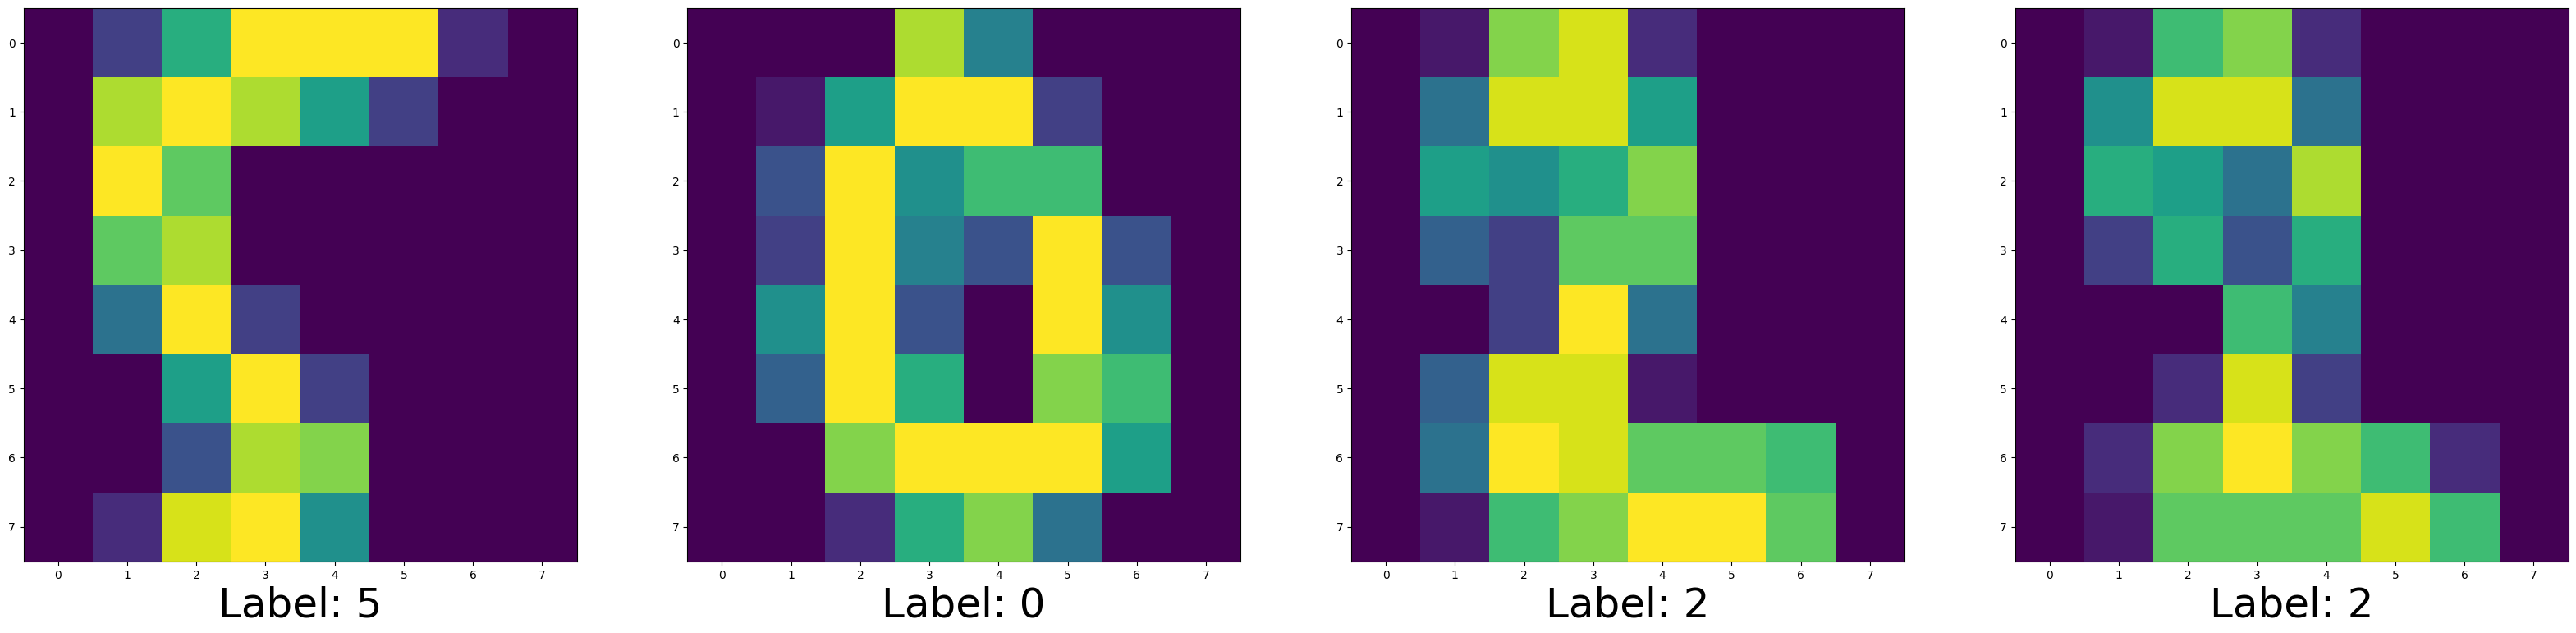

In [4]:
n = 4
random_indices = [random.randint(0, len(digits.images)) for i in range(n)]

fig, axes = plt.subplots(1, n, figsize=(40*1, 40*n))

for _col, sample_idx in enumerate(random_indices):
    img, lbl = digits.images[sample_idx], digits.target[sample_idx]
    axes[_col].imshow(img)
    axes[_col].set_xlabel(f"Label: {lbl}", fontsize=36) 

plt.show()

In [5]:
def train_test_split(data, target, fraction):
    ########  TODO ########################
    # 1. Shuffle the data and targets
    # 2. Split it based on the fraction
    # 3. Return (train_1, target_1, train_2, target_2of two splits
    data_train, data_test, target_train, target_test = \
        sklearn.model_selection.train_test_split(data, target, test_size=fraction, shuffle=True, random_state=42)

    # data_train = target_train = data_test = target_test = None # Remove this
    #######################################
    return data_train, target_train, data_test, target_test

In [6]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [7]:
data.shape, digits.target.shape

((1797, 64), (1797,))

In [8]:
# Split data into 50% train and 50% test subsets
X_trainval, y_trainval, X_test, y_test = \
    train_test_split( 
        # TODO First separate the test samples!
        data,
        digits.target,
        fraction=0.5
    )

# Now Split the TRAIN data into 80% train and 20% cross-validation subsets
X_train, y_train, X_val, y_val = \
    train_test_split( 
        # TODO Now separate the cross-validation samples!
        X_trainval,
        y_trainval,
        fraction=0.2
    )

In [9]:
print(f"{X_train.shape=} {y_train.shape=}")
print(f"{X_val.shape=} {y_val.shape=}")
print(f"{X_test.shape=} {y_test.shape=}")

X_train.shape=(718, 64) y_train.shape=(718,)
X_val.shape=(180, 64) y_val.shape=(180,)
X_test.shape=(899, 64) y_test.shape=(899,)


In [10]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the val subset
output = clf.decision_function(X_val)

print(f"Model output has shape {output.shape}")
# print(output)


########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = np.argmax(output, axis=1)
# print(preds)
# print(y_val)
########################################

Model output has shape (180, 10)


In [11]:
def accuracy_top1(predictions, targets):
    ########  TODO ########################
    # Return the mean accuracy (range from [0, 100])
    assert predictions.shape == targets.shape

    accuracy = len(predictions[predictions==targets])/len(targets)

    return accuracy
    ########################################

In [12]:
print(f"Cross-validation accuracy is {accuracy_top1(preds, y_val):0.3f}")

Cross-validation accuracy is 0.983


Go back to the previous cell and try different gamma values [0.1 0.01 0.001 0.0001 0.00001] for the classifier configuration and report results for each over the `val` set.


Please write down your tested values and results here. Which gamma value worked best on the val set?
**Answer**:  
- gamma= 0.1        Cross-validation Accuracy = 0.106  
- gamma = 0.01      Cross-validation Accuracy = 0.661  
- gamma = 0.001     Cross-validation Accuracy = 0.983  
- gamma= 0.0001     Cross-validation Accuracy = 0.939
- gamma = 0.00001   Cross-validation Accuracy = 0.939  


In [13]:
# Now insert your best gamma value and train the model again.
best_gamma_value = 0.001 # Replace this with your best finding!

clf = svm.SVC(gamma=best_gamma_value)
# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
output = clf.decision_function(X_test)

########  TODO ########################
# Use the (N, 10) outputs to get (N,) predictions (i.e class labels)
preds = np.argmax(output, axis=1)
########################################

In [14]:
print(f"Final test accuracy is {accuracy_top1(preds, y_test):0.3f}")

Final test accuracy is 0.974


In [15]:
output.shape

(899, 10)

In [16]:
def softmax(x):
    """
    Args       x: Numpy array of shape (N, num_classes) with real values
    Returns    Numpy array of shape (N, num_classes) with softmax probability scores
    """
    ########  TODO ########################
    # return per-sample softmax scores
    return np.exp(x)/np.sum(np.exp(x))
    ########################################

########  TODO ########################
# Using the softmax function defined above, convert (N, 10) outputs 
#to (N,) Softmax probabilities for the predicted class
scores = []
for output_row in output:
    softmax_probs = softmax(output_row)
    scores.append(np.max(softmax_probs))
########################################
print(scores)
print(len(scores), output.shape)

[0.6654619920719909, 0.6490014686214994, 0.6498062565906338, 0.6540892688614085, 0.6508372001478954, 0.6427484994077177, 0.6644821728606618, 0.6537344301512132, 0.6611601456105223, 0.648251596207404, 0.6428675985360609, 0.6484582909372497, 0.6502253827198934, 0.6750477309771319, 0.6896320709521515, 0.6578998413049268, 0.6476682068418478, 0.6683188242393764, 0.6540465804087496, 0.6682983225333865, 0.6554960216040997, 0.6508255855919951, 0.6473504257851149, 0.6630550312903092, 0.6495017537006088, 0.6729024053729603, 0.7126651639009224, 0.6696531748414459, 0.6692963932337402, 0.6566063279551482, 0.6733429260429946, 0.6533234267526645, 0.6564452012412475, 0.660842869135798, 0.6623389118923553, 0.6653160849704305, 0.6530987498853366, 0.6788598204937608, 0.6810083115916369, 0.6680891849301733, 0.6755446657898667, 0.6493481029613404, 0.657144582489821, 0.6524752648281857, 0.6556660665230682, 0.6522603942085238, 0.6520037662273582, 0.6605911050913942, 0.6830607520721967, 0.6547135026250703, 0.

Visualize some of the test predictions!

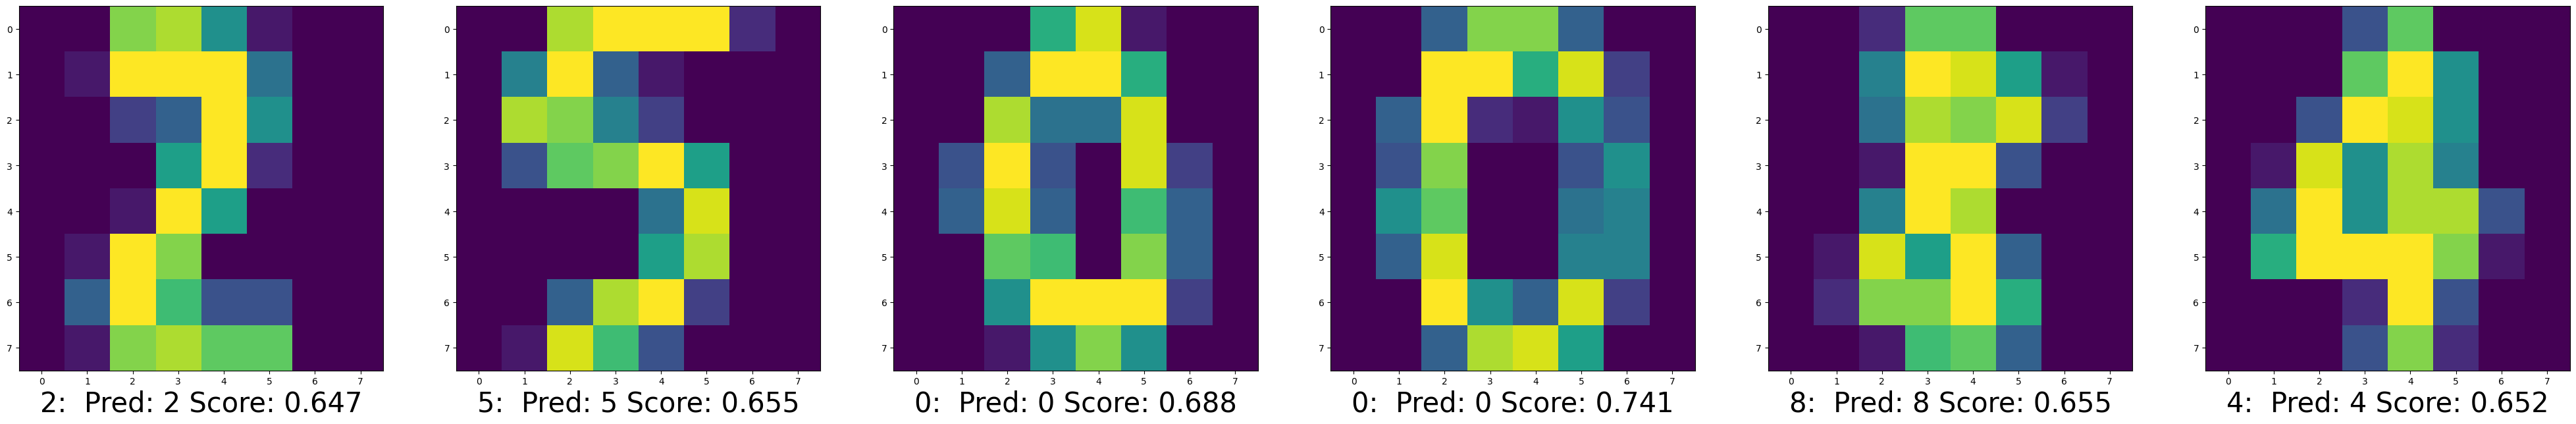

In [17]:
n = 6
random_indices = [random.randint(0, len(X_test)) for i in range(n)]
fig, axes = plt.subplots(1, n, figsize=(50*1, 50*n))


for _col, sample_idx in enumerate(random_indices):
    img = X_test[sample_idx].reshape((8, 8))
    lbl = y_test[sample_idx]

    axes[_col].imshow(img)
    axes[_col].set_xlabel(
        f"{lbl}:  Pred: {preds[sample_idx]} Score: {scores[sample_idx]:0.3f}",
        fontsize=30
    ) 

plt.show()